# Diffusion Limited Agrregation

This week's project is to use your use your skills at using random numbers to create a beautiful picture of what is called diffuction limited aggregation. There are many processes in nature where particles wander randomly and stick to a surface and then further particles accumulate, eventually forming interesting patterns---a common example is the creation of a snowflake, or the growth of zinc deposits onto an electrode in an electrolytic solution:  
![3D Diffusion Limited Aggregate](https://upload.wikimedia.org/wikipedia/commons/b/b8/DLA_Cluster.JPG)

You can even see a similar shape when electrical discharge occurs into plexiglass:

![High voltage breakdown](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Lichtenberg_figure_in_block_of_Plexiglas.jpg/250px-Lichtenberg_figure_in_block_of_Plexiglas.jpg)

Our goal this week is to have some fun trying to simulate this process in 2D, and quantify your Diffusion Limited Aggregate by it's fractal dimension. There are many good references online; one nice example is at http://paulbourke.net/fractals/dla/, and another is from the handout supplied to you today. 

## An animated image plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
%matplotlib notebook
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
mpl.rcParams.update({'font.size': 20})
mpl.rcParams['figure.figsize'] = 8, 8

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

The plot above has a piece of code that uses the .reshape(-1,1) command; here's what it does:

In [ ]:
junk = np.linspace(0, 2 , 5)
junk2 = junk.reshape(-1, 1)
print(junk)
print(junk2)
def test(x, y):
    return x + y

print(test(junk,junk2))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

import matplotlib as mpl
%matplotlib nbagg
import numpy.random
mpl.rcParams['figure.figsize'] = 8,8

def setupGrid(nx,ny):
    return np.zeros((nx,ny), dtype=bool)

def setupAttractor(grid):
    nx = grid.shape[0]
    ny = grid.shape[1]
    for index, x in np.ndenumerate(grid):
        if index[0] == 0 or index[0]==nx-1:
            grid[index] = 1
        elif index[1] == 0 or index[1]==ny-1:
            grid[index] = 1
    return grid

def plotGrid(grid,showGrid=False):
    nx = grid.shape[0]
    ny = grid.shape[1]

    plt.imshow(grid, aspect='equal')
    if showGrid==True:
        ax = plt.gca();
        ax = plt.gca();

    # Major ticks
        ax.set_xticks(np.arange(0, nx, 1));
        ax.set_yticks(np.arange(0, ny, 1));

    # Labels for major ticks
        ax.set_xticklabels(np.arange(0, nx, 1));
        ax.set_yticklabels(np.arange(0, ny, 1));

    # Minor ticks
        ax.set_xticks(np.arange(-.5, nx-1, 1), minor=True);
        ax.set_yticks(np.arange(-.5, ny-1, 1), minor=True);

    # Gridlines based on minor ticks
        ax.grid(which='minor', color='w', linestyle='-', linewidth=0.25)
    return None

def isInitialSiteEmpty(matrix):
    nx = matrix.shape[0]
    ny = matrix.shape[1]
    if matrix[(nx-1)//2,(ny-1)//2] == 1:
        return False
    else:
        return True

def checkNeighbors(matrix, nx,ny):
    if matrix[nx-1,ny] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    elif matrix[nx+1,ny] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    elif matrix[nx,ny-1] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    elif matrix[nx,ny+1] == 1:
        matrix[nx,ny] = 1
        return True, matrix
    else: 
        return False, matrix
    
def neighborSitesEmpty(matrix, nx,ny):
    if matrix[nx-1,ny] == 1 or matrix[nx+1,ny] == 1 \
        or matrix[nx,ny-1] == 1 or  matrix[nx,ny+1] == 1:
        return False
    else: 
        return True
    
def takeRandomStep(nx,ny):
    val = np.random.randint(1, 5)
    if val == 1:
        nx = nx + 1
    elif val == 2:
        nx = nx - 1
    elif val == 3:
        ny = ny + 1
    elif val ==4:
        ny = ny - 1
    return nx, ny


In [2]:
def setupDLA(N):
    if N%2 == 0: 
        raise RuntimeError( "Please choose an odd number for N\n Program exiting." )
    nx = N
    ny = N
    grid = setupGrid(nx,ny)
    attractor = setupAttractor(grid)
    return attractor

def growEntireDLA(N):
    matrix = setupDLA(N)
    while isInitialSiteEmpty(matrix) == True: 
        nx = (matrix.shape[0]-1)//2
        ny = (matrix.shape[1]-1)//2
        while neighborSitesEmpty(matrix, nx, ny) == True:
            nx, ny = takeRandomStep(nx, ny)
        else:
            matrix[nx, ny] = 1
    return matrix
        
            
    

<IPython.core.display.Javascript object>


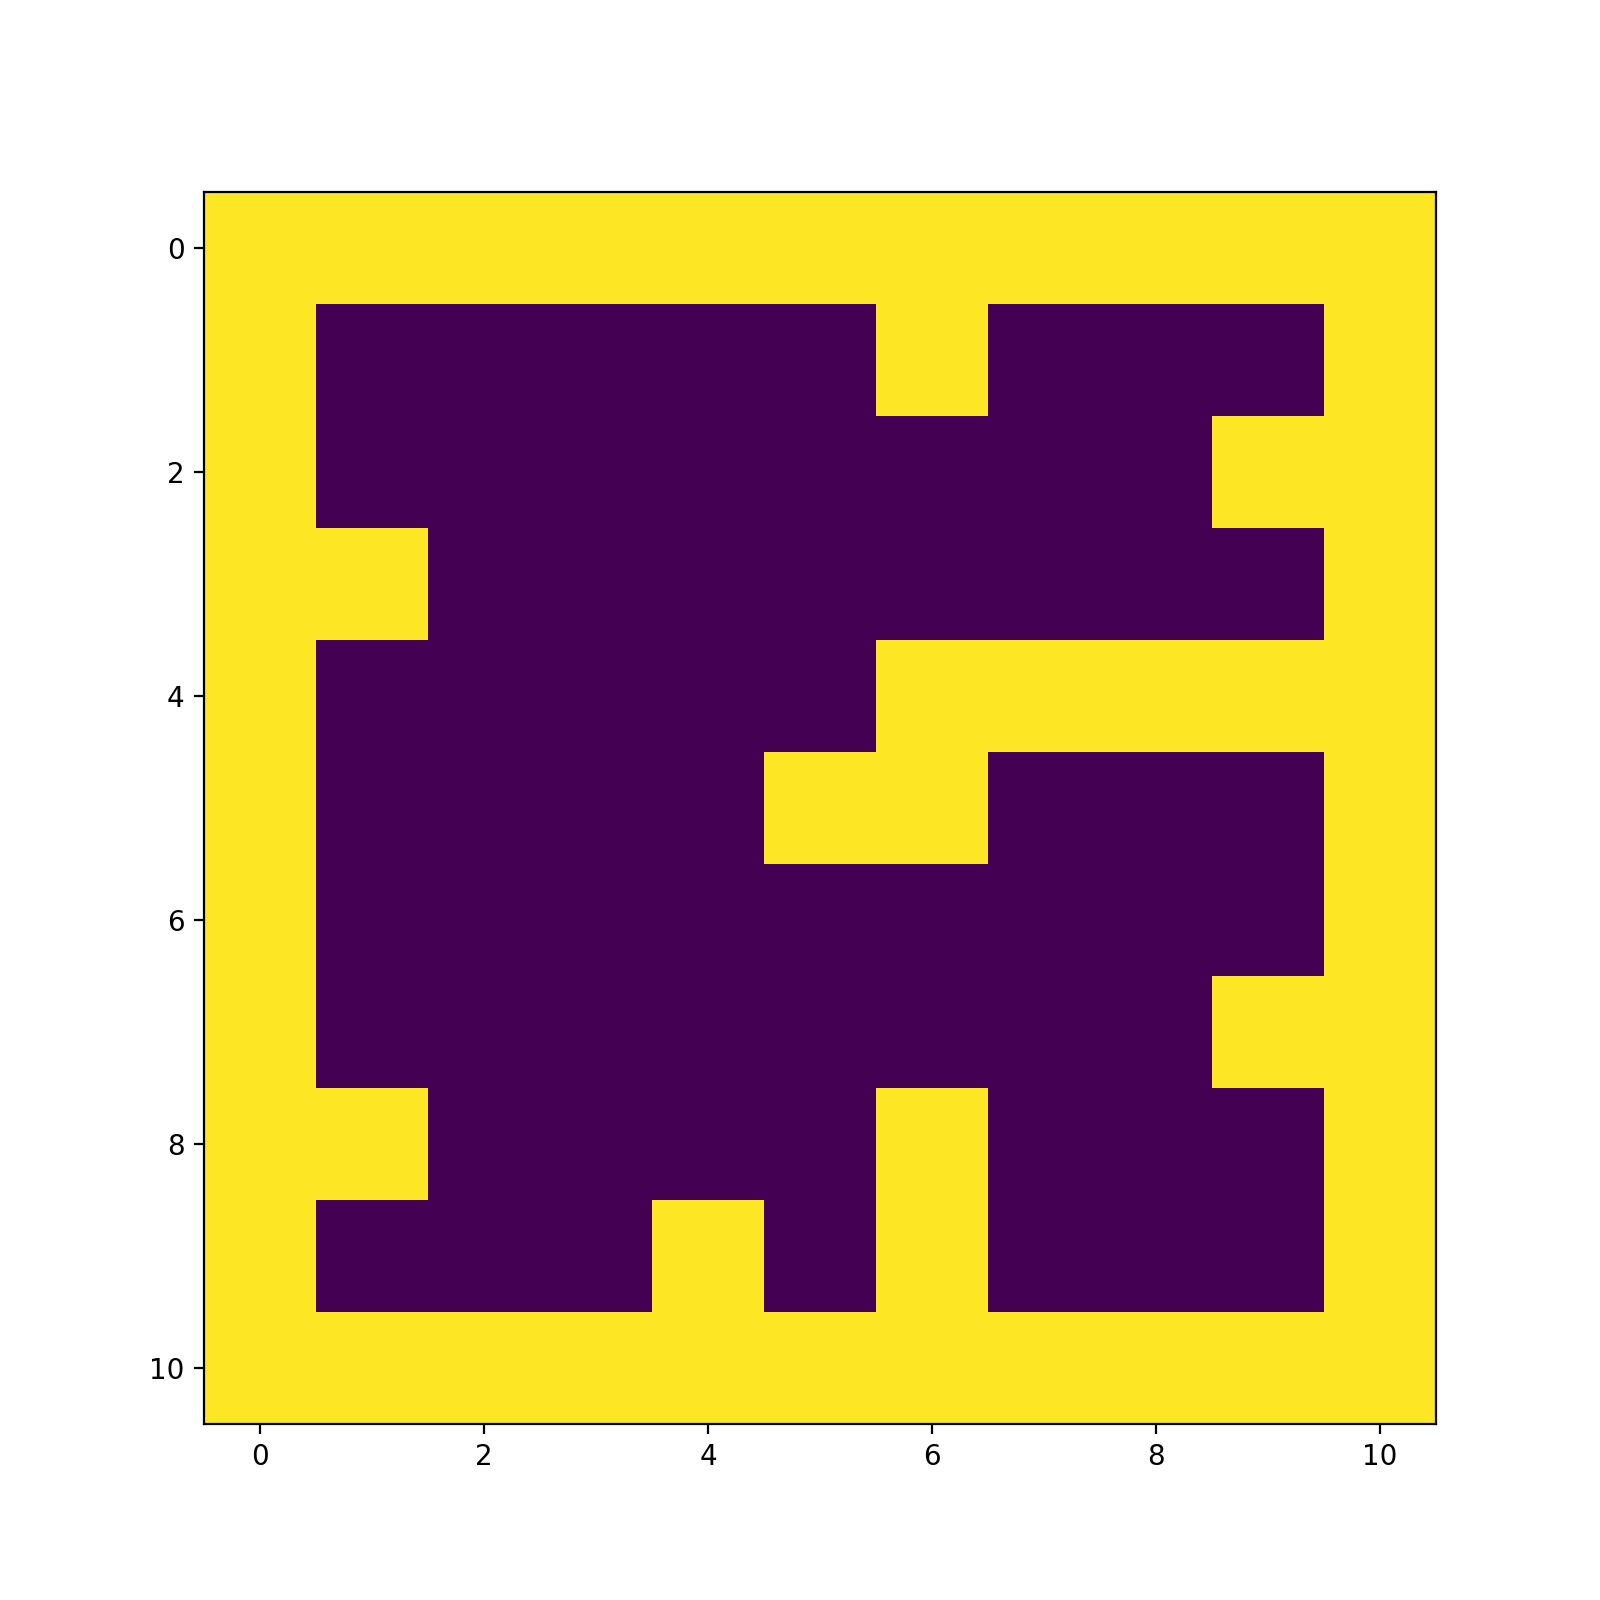

In [3]:
attractor = growEntireDLA(11)
plotGrid(attractor,showGrid=False)
plt.show()
    

<IPython.core.display.Javascript object>


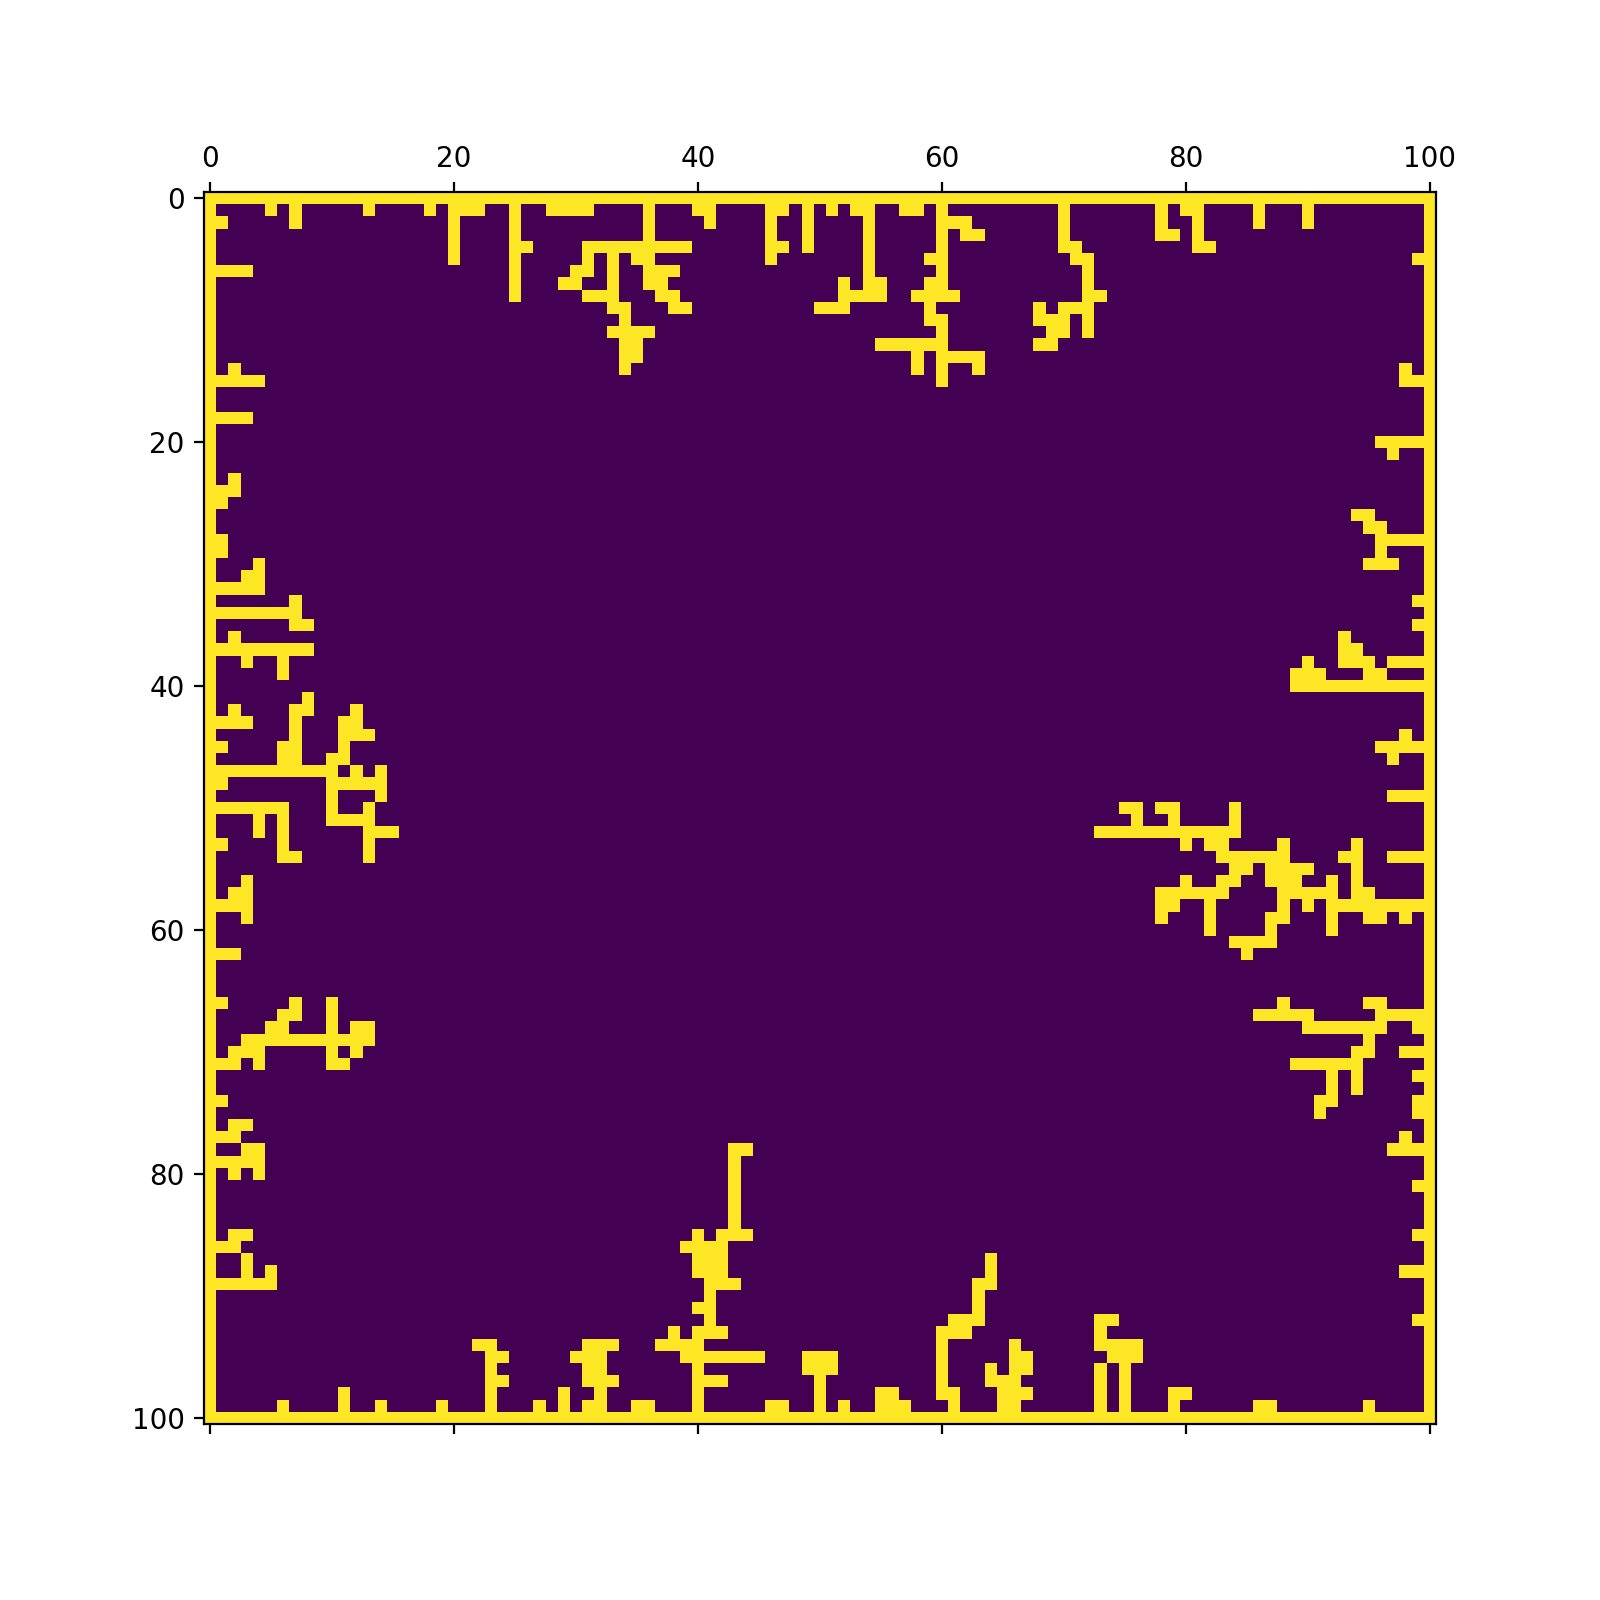

In [6]:
N = 101
matrix = setupDLA(N)
fig, ax = plt.subplots()
mat = ax.matshow(matrix)

def animateDLA(i):
    global N
    global matrix
    #if isInitialSiteEmpty(matrix) == True: 
    nx = (matrix.shape[0]-1)//2
    ny = (matrix.shape[1]-1)//2
    while neighborSitesEmpty(matrix, nx, ny) == True:
        nx, ny = takeRandomStep(nx, ny)
    matrix[nx, ny] = 1
    mat.set_data(matrix)
    return [mat]

ani= animation.FuncAnimation(fig, animateDLA, interval=1)


Here is some code to generate a two dimensional random walk using the random module:

In [ ]:
import random
n = 10000

x = np.zeros(n)
y = np.zeros(n)

for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
    

#plotting stuff:
plt.title("Random Walk ($n = " + str(n) + "$ steps)")
plt.plot(x, y)
plt.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
plt.show()
